#  ENGR421 HW3

# Özge Sayar

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

### Import Data 

In [13]:
dataset_images = np.genfromtxt('hw03_data_set_images.csv',delimiter=',').reshape(5, 39, 320)
dataset_labels = np.char.strip(np.genfromtxt('hw03_data_set_labels.csv',delimiter=',',dtype=str),'"').reshape(5, 39).astype(int)


### Train and Test Data 

In [14]:
#define train data (25 x 5)
trainingdata_images = dataset_images[:,:25,:].reshape(125, 320)
trainingdata_labels = dataset_labels[:,:25].reshape(125,)

K = np.max(trainingdata_labels)
    
#define test data (14 x 5)
testdata_images = dataset_images[:,25:,:].reshape(70, 320)
testdata_labels = dataset_labels[:,25:].reshape(70,)

#one hot encoding for train data
onehot_traininglabels=[[0,0,0,0,0]]*trainingdata_labels.shape[0]
for i in range (trainingdata_labels.shape[0]):
    if trainingdata_labels[i] == 1:
        label = [1,0,0,0,0]
    if trainingdata_labels[i] == 2:
        label = [0,1,0,0,0]
    if trainingdata_labels[i] == 3:
        label = [0,0,1,0,0]
    if trainingdata_labels[i] == 4:
        label = [0,0,0,1,0]
    if trainingdata_labels[i] == 5:
        label = [0,0,0,0,1] 
    onehot_traininglabels[i] = label

onehot_traininglabels = np.array(onehot_traininglabels)
print(onehot_traininglabels.shape)

#one hot encoding for test data
onehot_testlabels=[[0,0,0,0,0]]*testdata_labels.shape[0]
for i in range (testdata_labels.shape[0]):
    if testdata_labels[i] == 1:
        label = [1,0,0,0,0]
    if testdata_labels[i] == 2:
        label = [0,1,0,0,0]
    if testdata_labels[i] == 3:
        label = [0,0,1,0,0]
    if testdata_labels[i] == 4:
        label = [0,0,0,1,0]
    if testdata_labels[i] == 5:
        label = [0,0,0,0,1] 
    onehot_testlabels[i] = label
    
onehot_testlabels = np.array(onehot_testlabels)
print(onehot_testlabels.shape)

(125, 5)
(70, 5)


### Parameter Estimation 

In [15]:
# set learning parameters
eta = 0.001
epsilon = 0.001

In [16]:
# randomly initalize w and w0
np.random.seed(421)
w = np.random.uniform(low = -0.01, high = 0.01, size = (trainingdata_images.shape[1],np.max(trainingdata_labels)))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1,np.max(trainingdata_labels)))

In [17]:
#Sigmoid Function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [18]:
# define the gradient functions
def gradient_W(X, Y_truth, Y_predicted):
    return (np.asarray([-np.matmul((Y_truth[:, c] - Y_predicted[:, c])  * Y_predicted[:,c] * (1- Y_predicted[:,c]), X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum((Y_truth - Y_predicted) * Y_predicted * (1- Y_predicted), axis=0))

In [19]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    Y_predicted = sigmoid(trainingdata_images, w, w0)
    objective_values = np.append(objective_values, 0.5 * np.sum((onehot_traininglabels - Y_predicted) ** 2))
    
    w_old = w
    w0_old = w0

    w = w - eta * gradient_W(trainingdata_images, onehot_traininglabels, Y_predicted)
    w0 = w0 - eta * gradient_w0(onehot_traininglabels, Y_predicted)
    
    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((w - w_old)**2)) < epsilon:
        break
        
    iteration = iteration + 1
    
print(w)
print(w0)

[[-0.007313   -0.04365135 -0.02283699  0.11954214 -0.02471816]
 [-0.0772168   0.00808906 -0.11410913  0.19204372  0.02484684]
 [-0.08098001  0.06492251 -0.12291065  0.15759649  0.03581208]
 ...
 [ 0.04350351  0.12033443  0.03493316 -0.14106721 -0.11477042]
 [ 0.05483368 -0.15529821  0.04138291 -0.18311856 -0.01104428]
 [ 0.07461121 -0.23759405  0.09797277 -0.15343788 -0.01975529]]
[[-0.04886843 -0.17238056 -0.01419691 -0.03881936 -0.16691034]]


### Graph of Objective Function 

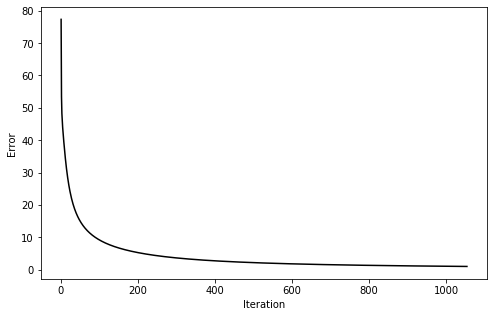

In [27]:
plt.figure(figsize = (8, 5))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

### Confusion Matrix for Training Set 

In [21]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, np.sum(onehot_traininglabels * np.array([1,2,3,4,5]), axis=1), rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


### Confusion Matrix for Test Set 

In [22]:
Ytest_predicted = sigmoid(testdata_images, w, w0)
ytest_values = np.argmax(Ytest_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(ytest_values, np.sum(onehot_testlabels * np.array([1,2,3,4,5]), axis=1), rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   1
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  13


##### the end